# Educational MiniProject1

In [3]:
# Needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

import seaborn as sns

In [4]:
df = pd.read_csv("cleandf.csv")
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,MathResult,ReadingResult,WritingResult
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,Pass,Pass,Pass
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,Fail,Pass,Pass
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42,Fail,Fail,Fail
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,Pass,Pass,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,Fail,Fail,Fail
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,Fail,Fail,Fail
30638,female,group C,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67,Fail,Pass,Fail
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,Pass,Pass,Pass


## Understanding Data

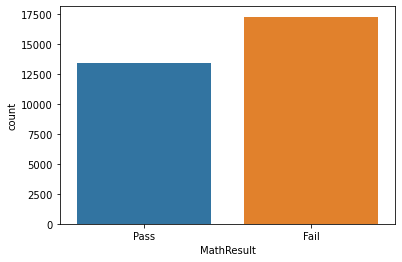

In [5]:
sns.countplot(x= "MathResult",data=df);

## Cleaning Dataset

In [6]:
df_dummy = pd.get_dummies(df, columns=['Gender', 'LunchType', 'TestPrep', 'IsFirstChild','TransportMeans'],
                          drop_first=True)
df_dummy.head()

,EthnicGroup,ParentEduc,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,MathResult,ReadingResult,WritingResult,Gender_male,LunchType_standard,TestPrep_none,IsFirstChild_yes,TransportMeans_school_bus
0,group C,bachelor's degree,married,regularly,3.0,< 5,71,71,74,Pass,Pass,Pass,0,1,1,1,1
1,group C,some college,married,sometimes,0.0,5 - 10,69,90,88,Fail,Pass,Pass,0,1,1,1,1
2,group B,master's degree,single,sometimes,4.0,< 5,87,93,91,Pass,Pass,Pass,0,1,1,1,1
3,group A,associate's degree,married,never,1.0,5 - 10,45,56,42,Fail,Fail,Fail,1,0,1,0,1
4,group C,some college,married,sometimes,0.0,5 - 10,76,78,75,Pass,Pass,Pass,1,1,1,1,1


In [7]:
df_dummy["WklyStudyHours"] = [1 if x == '> 10' else 0 for x in df_dummy["WklyStudyHours"]]
df_dummy.WklyStudyHours.unique()

array([0, 1], dtype=int64)

In [8]:
df_dummy["PracticeSport"] = [0 if x == 'never' else 1 for x in df_dummy["PracticeSport"]]
df_dummy.PracticeSport.unique()

array([1, 0], dtype=int64)

In [9]:
math_df = df_dummy.drop(["ReadingResult", "WritingResult", "MathScore"], axis = 1)
math_df

,EthnicGroup,ParentEduc,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,ReadingScore,WritingScore,MathResult,Gender_male,LunchType_standard,TestPrep_none,IsFirstChild_yes,TransportMeans_school_bus
0,group C,bachelor's degree,married,1,3.0,0,71,74,Pass,0,1,1,1,1
1,group C,some college,married,1,0.0,0,90,88,Fail,0,1,1,1,1
2,group B,master's degree,single,1,4.0,0,93,91,Pass,0,1,1,1,1
3,group A,associate's degree,married,0,1.0,0,56,42,Fail,1,0,1,0,1
4,group C,some college,married,1,0.0,0,78,75,Pass,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,group D,high school,single,1,2.0,0,61,65,Fail,0,1,1,0,1
30637,group E,high school,single,1,1.0,0,53,51,Fail,1,1,1,0,0
30638,group C,high school,married,1,1.0,0,70,67,Fail,0,0,0,0,0
30639,group D,associate's degree,married,1,3.0,0,90,93,Pass,0,1,0,0,1


In [10]:
math_df["MathResult"] = [0 if x == 'Fail' else 1 for x in math_df["MathResult"]]
math_df["MathResult"].unique()

array([1, 0], dtype=int64)

In [11]:
math_df.head()

,EthnicGroup,ParentEduc,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,ReadingScore,WritingScore,MathResult,Gender_male,LunchType_standard,TestPrep_none,IsFirstChild_yes,TransportMeans_school_bus
0,group C,bachelor's degree,married,1,3.0,0,71,74,1,0,1,1,1,1
1,group C,some college,married,1,0.0,0,90,88,0,0,1,1,1,1
2,group B,master's degree,single,1,4.0,0,93,91,1,0,1,1,1,1
3,group A,associate's degree,married,0,1.0,0,56,42,0,1,0,1,0,1
4,group C,some college,married,1,0.0,0,78,75,1,1,1,1,1,1


## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = math_df.drop(["EthnicGroup", "ParentEduc", "ParentMaritalStatus", "MathResult", "NrSiblings"], axis = 1)
y = math_df[["MathResult"]]

#split the dataset into training (80%) and testing (20%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

X_train2 = X_train

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#instantiate the model
log_regression = LogisticRegression(random_state=42)

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn import metrics

cm1 = metrics.confusion_matrix(y_test, y_pred)
print(cm1)

[[3092  370]
 [ 380 2287]]


In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8776309348996574


In [15]:
from sklearn.metrics import classification_report
 
logistic_report = classification_report(y_test, y_pred)
print(logistic_report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3462
           1       0.86      0.86      0.86      2667

    accuracy                           0.88      6129
   macro avg       0.88      0.88      0.88      6129
weighted avg       0.88      0.88      0.88      6129



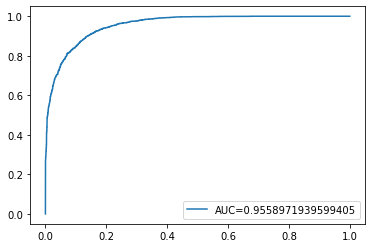

In [16]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

## SVM

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

a = GridSearchCV(estimator=SVC(random_state =42),
                 param_grid={"kernel" : ["linear", 'rbf'],
                             "gamma" : ["auto"],
                             "C" : [0.01,0.1]},
                verbose = 10)
a.fit(X_train,y_train)

print('Best kernel:', a.best_estimator_.get_params()['kernel'])
print('Best gamma:', a.best_estimator_.get_params()['gamma'])
print('Best C:', a.best_estimator_.get_params()['C'])

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START C=0.01, gamma=auto, kernel=linear...........................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 1/4] END C=0.01, gamma=auto, kernel=linear;, score=0.877 total time=   4.5s
[CV 2/5; 1/4] START C=0.01, gamma=auto, kernel=linear...........................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 1/4] END C=0.01, gamma=auto, kernel=linear;, score=0.881 total time=   4.5s
[CV 3/5; 1/4] START C=0.01, gamma=auto, kernel=linear...........................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 1/4] END C=0.01, gamma=auto, kernel=linear;, score=0.878 total time=   4.4s
[CV 4/5; 1/4] START C=0.01, gamma=auto, kernel=linear...........................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 1/4] END C=0.01, gamma=auto, kernel=linear;, score=0.881 total time=   4.5s
[CV 5/5; 1/4] START C=0.01, gamma=auto, kernel=linear...........................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 1/4] END C=0.01, gamma=auto, kernel=linear;, score=0.880 total time=   4.5s
[CV 1/5; 2/4] START C=0.01, gamma=auto, kernel=rbf..............................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 2/4] END C=0.01, gamma=auto, kernel=rbf;, score=0.870 total time=  13.1s
[CV 2/5; 2/4] START C=0.01, gamma=auto, kernel=rbf..............................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 2/4] END C=0.01, gamma=auto, kernel=rbf;, score=0.878 total time=  12.9s
[CV 3/5; 2/4] START C=0.01, gamma=auto, kernel=rbf..............................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 2/4] END C=0.01, gamma=auto, kernel=rbf;, score=0.868 total time=  13.2s
[CV 4/5; 2/4] START C=0.01, gamma=auto, kernel=rbf..............................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 2/4] END C=0.01, gamma=auto, kernel=rbf;, score=0.873 total time=  14.1s
[CV 5/5; 2/4] START C=0.01, gamma=auto, kernel=rbf..............................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 2/4] END C=0.01, gamma=auto, kernel=rbf;, score=0.877 total time=  13.5s
[CV 1/5; 3/4] START C=0.1, gamma=auto, kernel=linear............................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 3/4] END C=0.1, gamma=auto, kernel=linear;, score=0.877 total time=   4.2s
[CV 2/5; 3/4] START C=0.1, gamma=auto, kernel=linear............................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 3/4] END C=0.1, gamma=auto, kernel=linear;, score=0.882 total time=   4.4s
[CV 3/5; 3/4] START C=0.1, gamma=auto, kernel=linear............................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 3/4] END C=0.1, gamma=auto, kernel=linear;, score=0.878 total time=   4.1s
[CV 4/5; 3/4] START C=0.1, gamma=auto, kernel=linear............................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 3/4] END C=0.1, gamma=auto, kernel=linear;, score=0.880 total time=   4.2s
[CV 5/5; 3/4] START C=0.1, gamma=auto, kernel=linear............................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 3/4] END C=0.1, gamma=auto, kernel=linear;, score=0.882 total time=   4.2s
[CV 1/5; 4/4] START C=0.1, gamma=auto, kernel=rbf...............................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 4/4] END C=0.1, gamma=auto, kernel=rbf;, score=0.875 total time=   8.9s
[CV 2/5; 4/4] START C=0.1, gamma=auto, kernel=rbf...............................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 4/4] END C=0.1, gamma=auto, kernel=rbf;, score=0.882 total time=   9.5s
[CV 3/5; 4/4] START C=0.1, gamma=auto, kernel=rbf...............................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 4/4] END C=0.1, gamma=auto, kernel=rbf;, score=0.873 total time=   8.9s
[CV 4/5; 4/4] START C=0.1, gamma=auto, kernel=rbf...............................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 4/4] END C=0.1, gamma=auto, kernel=rbf;, score=0.882 total time=   9.0s
[CV 5/5; 4/4] START C=0.1, gamma=auto, kernel=rbf...............................


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 4/4] END C=0.1, gamma=auto, kernel=rbf;, score=0.878 total time=   9.0s


C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best kernel: linear
Best gamma: auto
Best C: 0.1


In [18]:
svm = SVC(kernel = "linear", gamma = "auto", C = 0.01, probability=True, random_state=42)
svm.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = svm.predict(X_test)

cm2 = metrics.confusion_matrix(y_test, y_pred)
print(cm2)

C:\Users\Vo Nguyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[3096  366]
 [ 380 2287]]


In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8782835699135259


In [20]:
svm_report = classification_report(y_test, y_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3462
           1       0.86      0.86      0.86      2667

    accuracy                           0.88      6129
   macro avg       0.88      0.88      0.88      6129
weighted avg       0.88      0.88      0.88      6129



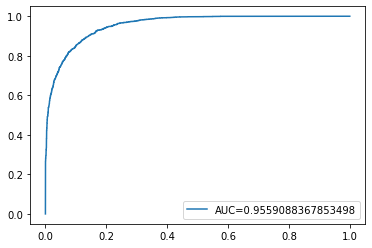

In [21]:
#define metrics
y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

## Comparisons

### Logistic Regression

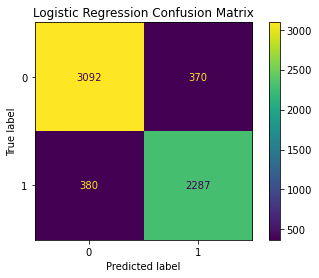

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=log_regression.classes_)
disp.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [23]:
print(logistic_report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3462
           1       0.86      0.86      0.86      2667

    accuracy                           0.88      6129
   macro avg       0.88      0.88      0.88      6129
weighted avg       0.88      0.88      0.88      6129



### SVM

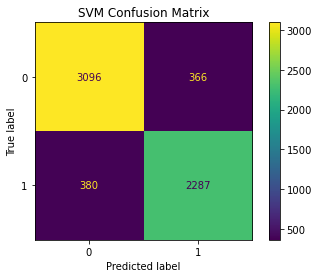

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=log_regression.classes_)
disp.plot()
plt.title("SVM Confusion Matrix")
plt.show()

In [25]:
print(svm_report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3462
           1       0.86      0.86      0.86      2667

    accuracy                           0.88      6129
   macro avg       0.88      0.88      0.88      6129
weighted avg       0.88      0.88      0.88      6129



## Weights and Interpretation

In [37]:
feature_names = X_train2.columns.tolist()
coefficients = log_regression.coef_

for i, feature_name in enumerate(feature_names):
    coefficient = coefficients[0][i]
    print(f"Feature: {feature_name} >>> Coefficient: {coefficient} \n")

Feature: PracticeSport >>> Coefficient: 0.13250569345841776 

Feature: WklyStudyHours >>> Coefficient: 0.1554137019707631 

Feature: ReadingScore >>> Coefficient: 1.1812071586934958 

Feature: WritingScore >>> Coefficient: 3.1505040042232744 

Feature: Gender_male >>> Coefficient: 1.9503675598580805 

Feature: LunchType_standard >>> Coefficient: 0.5210925977403912 

Feature: TestPrep_none >>> Coefficient: 0.5071950173687031 

Feature: IsFirstChild_yes >>> Coefficient: 0.0003271933216874706 

Feature: TransportMeans_school_bus >>> Coefficient: 0.013131300505185236 



## <font color='red'>Support Vector Evaluation </font> 

This section examines the support vectors. The evaluation in this section is conducted using a an approach in viewing the plots of the instances of the Support Vectors and their original. We will be using our original dataset to allow us to observe the support vectors through the SVC function.

Out of 24513 training points, only 7528 observations were used, where it was split between 1807 and 1789 results of testing. 

In [42]:
#Data Dimensions for our training data for our SVM model
#Support Vectors
print(svm.support_vectors_.shape)
print(svm.support_.shape)
print(svm.n_support_ )


(7528, 9)
(7528,)
[3763 3765]


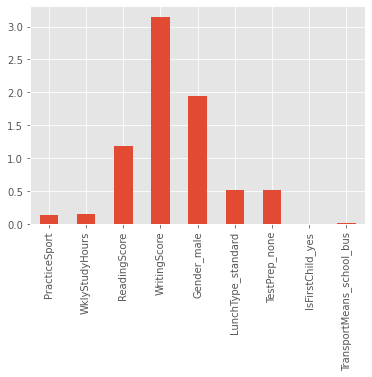

In [28]:
plt.style.use('ggplot')
coefficients = pd.Series(log_regression.coef_[0],index=feature_names)
coefficients.plot(kind='bar')
plt.show()

Based on the analysis of our SVM model for predicting pass or fail, we have identified two key support vectors that significantly contribute to the model's decision-making process. The graphs above clearly illustrate that the larger support vectors are predominantly associated with the Writing Score and Gender variables. This observation aligns with our previous exploratory data analysis, where we identified Gender as an important feature in our model.

By closely examining the support vectors, we can gain valuable insights into the underlying patterns and dynamics that influence the classification outcomes. Specifically, the prominent influence of Writing Score and Gender on the support vectors suggests that these variables play a crucial role in determining the pass or fail status. This finding validates our initial hypothesis and highlights the significance of considering these factors when making predictions using our SVM model.

In [29]:
log_regression.coef_

array([[1.32505693e-01, 1.55413702e-01, 1.18120716e+00, 3.15050400e+00,
        1.95036756e+00, 5.21092598e-01, 5.07195017e-01, 3.27193322e-04,
        1.31313005e-02]])

### Support Vectors Plots

The following graphs display the distribution of support vectors on the left side and the distribution of the original data on the right side. It is evident that within the support vectors, there is a notable similarity in the distribution of points across the variables for both the "failed" and "passed" groups.

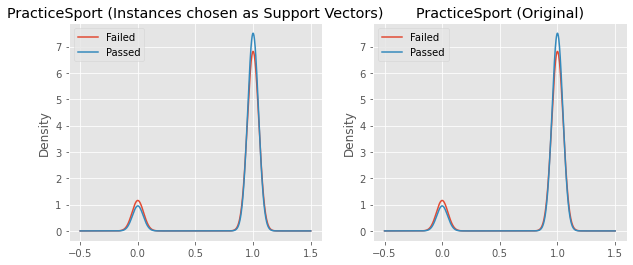

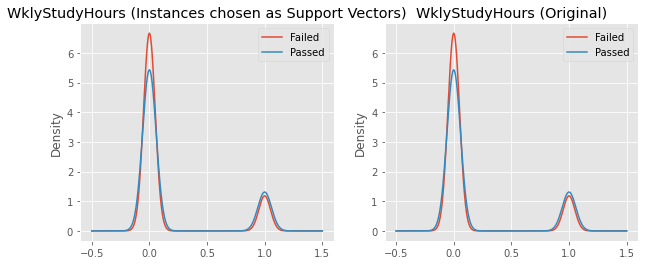

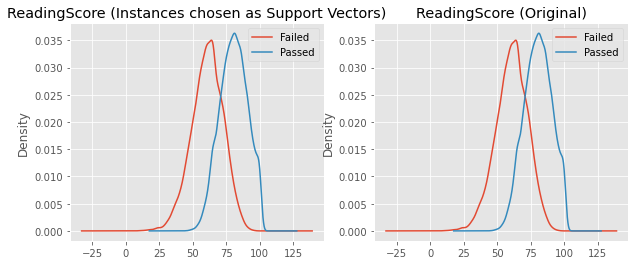

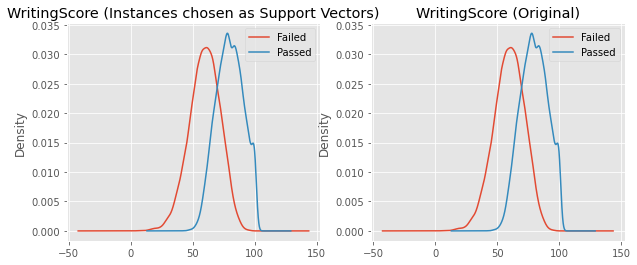

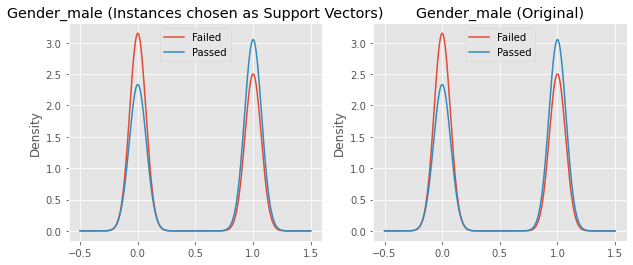

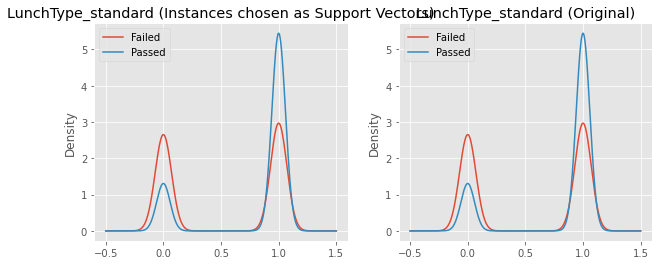

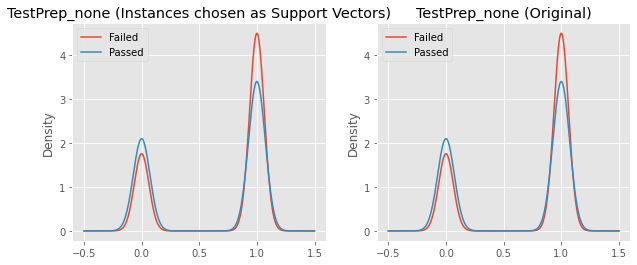

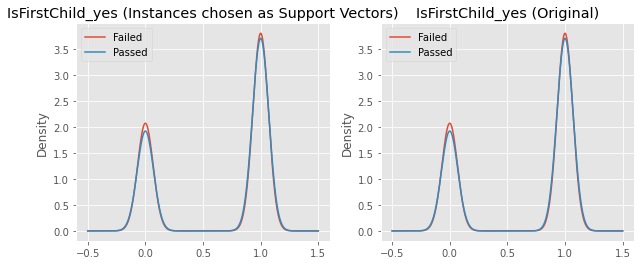

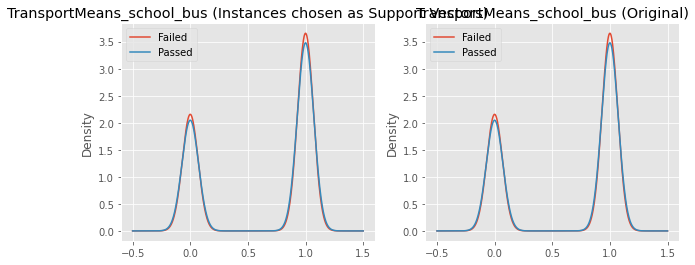

In [36]:
#now lets see the statistics of these attributes
from pandas.plotting import boxplot

math_df2 = df_dummy.drop(["ReadingResult", "WritingResult"], axis = 1)
#group the original data and the support vectors
df_grouped = math_df2.groupby(['MathResult'])
#now lets see the statistics of these attributes
from pandas.plotting import boxplot

#group the original data and the support vectors
df_grouped = math_df2.groupby(['MathResult'])

for v in feature_names:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Failed','Passed'])
    plt.title(v+' (Instances chosen as Support Vectors)')

    #plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Failed','Passed'])
    plt.title(v+' (Original)')

The analysis conducted in this section provides insights into the original statistics of the data and sheds light on the statistics of the support vectors. Comparing the distributions, we observe that the separation between classes is less pronounced for the support vectors compared to the original data. 